<a href="https://colab.research.google.com/github/sergiopolimante/forecast/blob/main/Previs%C3%A3o_(forecasting)_com_AutoML_AutoTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autots



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.4/777.4 kB 10.0 MB/s eta 0:00:00


In [ ]:
from autots.datasets import load_monthly # also: _hourly, _daily, _weekly, or _yearly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

df_long = load_monthly(long=True)

df_long

,datetime,value,series_id,series_name
0,1953-04-01,2.83000,GS10,10-Year Treasury Constant Maturity Rate
1,1953-05-01,3.05000,GS10,10-Year Treasury Constant Maturity Rate
2,1953-06-01,3.11000,GS10,10-Year Treasury Constant Maturity Rate
3,1953-07-01,2.93000,GS10,10-Year Treasury Constant Maturity Rate
4,1953-08-01,2.95000,GS10,10-Year Treasury Constant Maturity Rate
...,...,...,...,...
4094,2019-08-01,190.46324,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4095,2019-09-01,134.36179,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4096,2019-10-01,118.48822,USEPUINDXM,Economic Policy Uncertainty Index for United S...
4097,2019-11-01,131.78183,USEPUINDXM,Economic Policy Uncertainty Index for United S...


<Axes: xlabel='datetime', ylabel='value'>

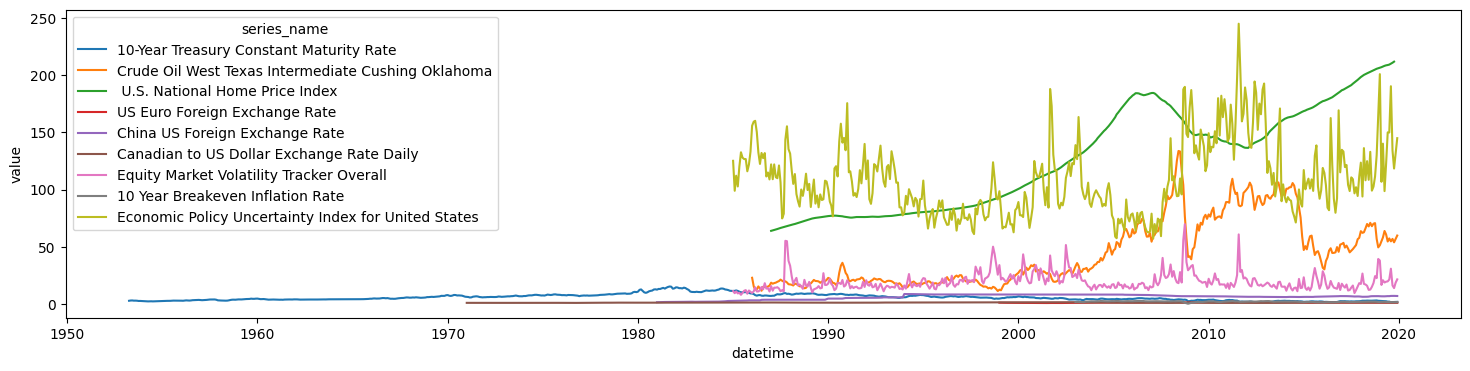

In [ ]:
# @title Checking the Data
import seaborn as sns
plt.figure(figsize=(18, 4))  # Width x Height in inches

sns.lineplot(df_long, x='datetime', y='value', hue='series_name')

In [ ]:
# @title split in test and train
df_long_train = df_long.sort_values(by=['series_id', 'datetime']).groupby('series_id').head(-8)
df_long_test = df_long.sort_values(by=['series_id', 'datetime']).groupby('series_id').tail(8)

In [ ]:
# @title Run AutoTS auto-ml framework
from autots import AutoTS

model = AutoTS(
    forecast_length=16,
    # model_list="superfast",
    # transformer_list='superfast',
    frequency='infer',
    ensemble=['horizontal-max'],
    max_generations=10,
    # num_validations=0,
    verbose=1
)
model = model.fit(df_long_train, date_col='datetime', value_col='value', id_col='series_id')

# Print the description of the best model
print(model)

Data frequency is: MS, used frequency is: MS
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
25/25 [==============================] - 8s 8ms/step - loss: 0.3782
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3776
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3774
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3774
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3773
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3773
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3772
Epoch 8/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3772
Epoch 9/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3775
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3772
Epoch 11/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3773
Epoch 12/50
25/25 [==============================] - 0s 7ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpaa1vj0dc/h12y4reo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaa1vj0dc/nd9l20gd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36664', 'data', 'file=/tmp/tmpaa1vj0dc/h12y4reo.json', 'init=/tmp/tmpaa1vj0dc/nd9l20gd.json', 'output', 'file=/tmp/tmpaa1vj0dc/prophet_model6_8slq6n/prophet_model-20231012200229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / s

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 67 in generation 0: GLM
Model Number: 68 with model ETS in generation 0 of 10
Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71 in generation 0: UnobservedComponents
Model Number: 72 with model VAR in generation 0 of 10
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type=

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:03:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Model Number: 79 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'PowerTransformer', '2': 'SeasonalDifference'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'lag_1': 12, 'method': 'LastValue'}}}. fail_on_forecast_nan=True") in model 79 in generation 0: UnivariateMotif
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif in generation 0 of 10
Model Number: 82 with model NVAR in generation 0 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 82 in generation 0: NVAR
Model Number: 83 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 83 in gen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577513.9874291763, tolerance: 160.3113705002658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 114 with model SeasonalNaive in generation 0 of 10
Model Number: 115 with model ETS in generation 0 of 10
Model Number: 116 with model VAR in generation 0 of 10
Model Number: 117 with model UnobservedComponents in generation 0 of 10
Model Number: 118 with model WindowRegression in generation 0 of 10
Model Number: 119 with model MetricMotif in generation 0 of 10
Model Number: 120 with model ETS in generation 0 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 120 in generation 0: ETS
Model Number: 121 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 121 in generation 0: SectionalMotif
Model Number: 122 with model MetricMotif in generation 0 of 10
Model Number: 123 with model GLS in generation 0 of 10
Model Number: 124 with model NVAR in generation 0 of 10
Model Number: 125 with model SeasonalNaive in generation 0 of 10
Model Number: 1

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Model Number: 131 with model GLM in generation 0 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 131 in generation 0: GLM
Model Number: 132 with model GLM in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 133 with model SeasonalNaive in generation 0 of 10
Model Number: 134 with model ConstantNaive in generation 0 of 10
Model Number: 135 with model ConstantNaive in generation 0 of 10
Model Number: 136 with model UnivariateMotif in generation 0 of 10
Model Number: 137 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 137 in generation 0: GLM
Model Number: 138 with model MetricMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 139 with model ARIMA in generation 0 of 10
Model Number: 140 with model Theta in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model MetricMotif in generation 0 of 10
Model Number: 143 with model ARDL in generation 0 of 10
Model Number: 144 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model NVAR in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'SeasonalityMotifImputer', 'transformations': {'0': 'AlignLastValue', '1': 'SeasonalDifference', '2': 'PowerTransformer', '3': 'PctChangeTransformer', '4': 'MaxAbsScaler', '5': 'SeasonalDifference'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'lag_1': 7, 'method': 'L

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 149 in generation 0: GLM
Model Number: 150 with model LastValueNaive in generation 0 of 10
Model Number: 151 with model AverageValueNaive in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 152 with model LastValueNaive in generation 0 of 10
Model Number: 153 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 154 with model MultivariateMotif in generation 0 of 10
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model VECM in generation 0 of 10
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 158 in generation 0: ARDL
Model Number: 159 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 159 in generation 0: DatepartRegression
Model Number: 160 with model SeasonalNaive in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 163 in generation 0: AR

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 184 in generation 0: GLM
Model Number: 185 with model ETS in generation 0 of 10
Model Number: 186 with model MetricMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 187 with model MultivariateRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 188 with model VAR in generation 1 of 10
Model Number: 189 with model Theta in generation 1 of 10
Model Number: 190 with model GLS in generation 1 of 10
Model Number: 191 with model ARIMA in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/usr/local/lib/python3.10/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 192 with model MultivariateMotif in generation 1 of 10
Model Number: 193 with model VAR in generation 1 of 10
Model Number: 194 with model VAR in generation 1 of 10
Model Number: 195 with model MultivariateMotif in generation 1 of 10
Model Number: 196 with model DatepartRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 196 in generation 1: DatepartRegression
Model Number: 197 with model VECM in generation 1 of 10
Model Number: 198 with model UnivariateMotif in generation 1 of 10
Model Number: 199 with model VECM in generation 1 of 10
Model Number: 200 with model Theta in generation 1 of 10
Model Number: 201 with model AverageValueNaive in generation 1 of 10
Model Number: 202 with model VAR in generation 1 of 10
Model Number: 203 with model UnivariateMotif in generation 1 of 10
Model Number: 204 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 204 in generation 1: SectionalMotif
Model Number: 205 with model MetricMotif in generation 1 of 10
Model Number: 206 with model ETS in generation 1 of 10
Model Number: 207 with model MultivariateRegression in generation 1 of 10
Model Number: 208 with model AverageValueNaive in generation 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577513.9874291763, tolerance: 160.3113705002658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 226 with model MultivariateMotif in generation 1 of 10
Model Number: 227 with model FBProphet in generation 1 of 10
Model Number: 228 with model AverageValueNaive in generation 1 of 10
Model Number: 229 with model AverageValueNaive in generation 1 of 10
Model Number: 230 with model Theta in generation 1 of 10
Model Number: 231 with model FBProphet in generation 1 of 10


20:18:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 232 with model ConstantNaive in generation 1 of 10
Model Number: 233 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 233 in generation 1: MultivariateRegression
Model Number: 234 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double

Model Number: 235 with model DatepartRegression in generation 1 of 10
Model Number: 236 with model ETS in generation 1 of 10
Model Number: 237 with model Theta in generation 1 of 10
Model Number: 238 with model LastValueNaive in generation 1 of 10
Model Number: 239 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 240 with model VAR in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 240 in generation 1: VAR
Model Number: 241 with model VECM in generation 1 of 10
Model Number: 242 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 242 in generation 1: ARIMA
Model Number: 243 with model UnivariateMotif in generation 1 of 10
Model Number: 244 with model GLM in generation 1 of 10
Model Number: 245 with model SeasonalNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 246 with model NVAR in generation 1 of 10
Model Number: 247 with model GLM in generation 1 of 10
Model Number: 248 with model VECM in generation 1 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 248 in generation 1: VECM
Model Number: 249 with model ConstantNaive in generation 1 of 10
Model Number: 250 with model GLS in generation 1 of 10
Model Number: 251 with model VAR in generation 1 of 10
Model Number: 252 with model VAR in generation 1 of 10
Model Number: 253 with model LastValueNaive in generation 1 of 10
Model Number: 254 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 254 in generation 1: MetricMotif
Model Number: 255 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 256 with model VAR in generation 1 of 10
Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model MultivariateMotif in generation 1 of 10
Model Number: 259 with model ConstantNaive in generation 1 of 10
Model Number: 260 with model GLS in generation 1 of 10
Model Number: 261 with model LastValueNaive in generation 1 of 10
Model Number: 262 with model AverageValueNaive in generation 1 of 10
Model Number: 263 with model UnobservedComponents in generation 1 of 10
Model Number: 264 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 264 in generation 1: MetricMotif
Model Number: 265 with model VECM in generation 1 of 10
Model Number: 266 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 266 in generation 1: GLM
Model Number: 267 with model ETS in generation

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 268 with model MetricMotif in generation 1 of 10
Model Number: 269 with model Theta in generation 1 of 10
Model Number: 270 with model DatepartRegression in generation 1 of 10
Model Number: 271 with model SeasonalNaive in generation 1 of 10
Model Number: 272 with model LastValueNaive in generation 1 of 10
Model Number: 273 with model ConstantNaive in generation 1 of 10
Model Number: 274 with model Theta in generation 1 of 10
Model Number: 275 with model ARIMA in generation 1 of 10
Model Number: 276 with model UnobservedComponents in generation 1 of 10
Model Number: 277 with model MultivariateMotif in generation 1 of 10
Model Number: 278 with model ETS in generation 1 of 10
Model Number: 279 with model VAR in generation 1 of 10
Model Number: 280 with model ETS in generation 1 of 10
Model Number: 281 with model LastValueNaive in generation 1 of 10
Model Number: 282 with model VAR in generation 1 of 10
Model Number: 283 with model GLS in generation 1 of 10
Model Number: 284 

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 302 with model UnobservedComponents in generation 1 of 10
Model Number: 303 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 304 with model NVAR in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 305 with model VECM in generation 1 of 10
Model Number: 306 with model UnobservedComponents in generation 1 of 10
Model Number: 307 with model MultivariateRegression in generation 1 of 10
Model Number: 308 with model MultivariateMotif in generation 1 of 10
Model Number: 309 with model ARIMA in generation 1 of 10
Model Number: 310 with model VAR in generation 1 of 10
Model Number: 311 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 311 in generation 1: DatepartRegression
New Generation: 2 of 10
Model Number: 312 with model SeasonalNaive in generation 2 of 10
Model Number: 313 with model SectionalMotif in generation 2 of 10
Model Number: 314 with model SeasonalNaive in generation 2 of 10
Model Number: 315 with model AverageValueNaive in generation 2 of 10
Model Number: 316 with model MultivariateMotif in generation 2 of 10
Model Number: 317 with model LastValueNaive in gene

/usr/local/lib/python3.10/dist-packages/autots/tools/window_functions.py:459: RuntimeWarning: Mean of empty slice
  return np.nanmean(sliding_window_view(x, w, axis=axis), axis=-1)


Model Number: 353 with model VECM in generation 2 of 10
Model Number: 354 with model Theta in generation 2 of 10
Model Number: 355 with model LastValueNaive in generation 2 of 10
Model Number: 356 with model SectionalMotif in generation 2 of 10
Model Number: 357 with model ETS in generation 2 of 10
Model Number: 358 with model UnobservedComponents in generation 2 of 10
Model Number: 359 with model MultivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 359 in generation 2: MultivariateMotif
Model Number: 360 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:620: RuntimeWarning: invalid value encountered in divide
  K = (u / d).T[:n_components]  # see (6.33) p.140


Model Number: 361 with model ETS in generation 2 of 10
Model Number: 362 with model DatepartRegression in generation 2 of 10
Model Number: 363 with model VECM in generation 2 of 10
Model Number: 364 with model LastValueNaive in generation 2 of 10
Model Number: 365 with model UnivariateRegression in generation 2 of 10
Model Number: 366 with model NVAR in generation 2 of 10
Model Number: 367 with model ARIMA in generation 2 of 10
Model Number: 368 with model ETS in generation 2 of 10
Model Number: 369 with model MultivariateMotif in generation 2 of 10
Model Number: 370 with model Theta in generation 2 of 10
Model Number: 371 with model VAR in generation 2 of 10
Model Number: 372 with model Theta in generation 2 of 10
Model Number: 373 with model Theta in generation 2 of 10
Model Number: 374 with model DatepartRegression in generation 2 of 10
Model Number: 375 with model GLM in generation 2 of 10
Model Number: 376 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError(

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 378 with model LastValueNaive in generation 2 of 10
Model Number: 379 with model MetricMotif in generation 2 of 10
Model Number: 380 with model FBProphet in generation 2 of 10
Model Number: 381 with model NVAR in generation 2 of 10
Model Number: 382 with model ETS in generation 2 of 10
Model Number: 383 with model VECM in generation 2 of 10
Model Number: 384 with model SeasonalNaive in generation 2 of 10
Model Number: 385 with model SeasonalNaive in generation 2 of 10
Model Number: 386 with model VAR in generation 2 of 10
Model Number: 387 with model UnobservedComponents in generation 2 of 10
Model Number: 388 with model GLS in generation 2 of 10
Model Number: 389 with model ConstantNaive in generation 2 of 10
Model Number: 390 with model MetricMotif in generation 2 of 10
Model Number: 391 with model SeasonalNaive in generation 2 of 10
Model Number: 392 with model MetricMotif in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on invers

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 404 with model VAR in generation 2 of 10
Model Number: 405 with model MultivariateMotif in generation 2 of 10
Model Number: 406 with model Theta in generation 2 of 10
Model Number: 407 with model DatepartRegression in generation 2 of 10
Model Number: 408 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 408 in generation 2: ARIMA
Model Number: 409 with model VAR in generation 2 of 10
Model Number: 410 with model GLS in generation 2 of 10
Model Number: 411 with model MultivariateMotif in generation 2 of 10
Model Number: 412 with model MultivariateRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 413 with model MultivariateRegression in generation 2 of 10
Model Number: 414 with model AverageValueNaive in generation 2 of 10
Model Number: 415 with model DatepartRegression in generation 2 of 10
Model Number: 416 with model UnobservedComponents in generation 2 of 10
Model Number: 417 with model VAR in generation 2 of 10
Model Number: 418 with model ConstantNaive in generation 2 of 10
Model Number: 419 with model ETS in generation 2 of 10
Model Number: 420 with model SectionalMotif in generation 2 of 10
Model Number: 421 with model VAR in generation 2 of 10
Model Number: 422 with model ARIMA in generation 2 of 10
Model Number: 423 with model SeasonalNaive in generation 2 of 10
Model Number: 424 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 424 in generation 2: LastValueNaive
Model Number: 425 with model MultivariateRegression in generation 2 of 10
Model Number: 426 with model VECM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 446 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 446 in generation 3: ETS
Model Number: 447 with model ConstantNaive in generation 3 of 10
Model Number: 448 with model AverageValueNaive in generation 3 of 10
Model Number: 449 with model SectionalMotif in generation 3 of 10
Model Number: 450 with model LastValueNaive in generation 3 of 10
Model Number: 451 with model UnivariateMotif in generation 3 of 10
Model Number: 452 with model LastValueNaive in generation 3 of 10
Model Number: 453 with model ConstantNaive in generation 3 of 10
Model Number: 454 with model Theta in generation 3 of 10
Model Number: 455 with model ETS in generation 3 of 10
Model Number: 456 with model LastValueNaive in generation 3 of 10
Model Number: 457 with model VAR in generation 3 of 10
Model Number: 458 with model AverageValueNaive in generation 3 of 10
Model Number: 459 with model VAR in generation 3 of 10
Model Number: 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:34:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Model Number: 499 with model AverageValueNaive in generation 3 of 10
Model Number: 500 with model AverageValueNaive in generation 3 of 10
Model Number: 501 with model ARIMA in generation 3 of 10
Model Number: 502 with model MultivariateRegression in generation 3 of 10
Model Number: 503 with model UnobservedComponents in generation 3 of 10
Model Number: 504 with model MetricMotif in generation 3 of 10
Model Number: 505 with model LastValueNaive in generation 3 of 10
Model Number: 506 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.73358e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 507 with model AverageValueNaive in generation 3 of 10
Model Number: 508 with model NVAR in generation 3 of 10
Model Number: 509 with model MultivariateMotif in generation 3 of 10
Model Number: 510 with model VAR in generation 3 of 10
Model Number: 511 with model UnobservedComponents in generation 3 of 10
Model Number: 512 with model Theta in generation 3 of 10
Model Number: 513 with model Theta in generation 3 of 10
Model Number: 514 with model DatepartRegression in generation 3 of 10
Model Number: 515 with model LastValueNaive in generation 3 of 10
Model Number: 516 with model VECM in generation 3 of 10
Model Number: 517 with model MultivariateMotif in generation 3 of 10
Model Number: 518 with model ETS in generation 3 of 10
Model Number: 519 with model LastValueNaive in generation 3 of 10
Model Number: 520 with model ConstantNaive in generation 3 of 10
Model Number: 521 with model MultivariateRegression in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: overflow encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


Model Number: 522 with model NVAR in generation 3 of 10
Model Number: 523 with model LastValueNaive in generation 3 of 10
Model Number: 524 with model SectionalMotif in generation 3 of 10
Model Number: 525 with model SeasonalNaive in generation 3 of 10
Model Number: 526 with model MultivariateMotif in generation 3 of 10
Model Number: 527 with model VAR in generation 3 of 10
Model Number: 528 with model UnobservedComponents in generation 3 of 10
Model Number: 529 with model LastValueNaive in generation 3 of 10
Model Number: 530 with model ARIMA in generation 3 of 10
Model Number: 531 with model GLS in generation 3 of 10
Model Number: 532 with model MultivariateMotif in generation 3 of 10
Model Number: 533 with model MetricMotif in generation 3 of 10
Model Number: 534 with model FBProphet in generation 3 of 10
Model Number: 535 with model DatepartRegression in generation 3 of 10
Model Number: 536 with model GLS in generation 3 of 10
Model Number: 537 with model ARIMA in generation 3 of 1

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 552 in generation 3: Theta
Model Number: 553 with model MultivariateMotif in generation 3 of 10
Model Number: 554 with model GLM in generation 3 of 10
Model Number: 555 with model VAR in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 556 with model LastValueNaive in generation 3 of 10
Model Number: 557 with model VAR in generation 3 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 557 in generation 3: VAR
Model Number: 558 with model VECM in generation 3 of 10
Model Number: 559 with model NVAR in generation 3 of 10
Model Number: 560 with model NVAR in generation 3 of 10
Model Number: 561 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 561 in generation 3: DatepartRegression
New Generation: 4 of 10
Model Number: 562 with model VAR in generation 4 of 10
Model Number: 563 with model SectionalMotif in generation 4 of 10
Model Number: 564 with model NVAR in generation 4 of 10
Model Number: 565 with model UnivariateRegression in generation 4 of 10
Model Number: 566 with model VAR in generation 4 of 10
Model Number: 567 with model MetricMotif in generation 4 of 10
M

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 571 in generation 4: ARIMA
Model Number: 572 with model ARIMA in generation 4 of 10
Model Number: 573 with model SeasonalNaive in generation 4 of 10
Model Number: 574 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 574 in generation 4: ARIMA
Model Number: 575 with model ETS in generation 4 of 10
Model Number: 576 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 577 with model VAR in generation 4 of 10
Model Number: 578 with model SeasonalNaive in generation 4 of 10
Model Number: 579 with model SectionalMotif in generation 4 of 10
Model Number: 580 with model LastValueNaive in generation 4 of 10
Model Number: 581 with model AverageValueNaive in generation 4 of 10
Model Number: 582 with model Theta in generation 4 of 10
Model Number: 583 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 583 in generation 4: ARDL
Model Number: 584 with model MultivariateRegression in generation 4 of 10
Model Number: 585 with model MultivariateMotif in generation 4 of 10
Model Number: 586 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 586 in generation 4: DatepartRegression
Model Number: 587 with model NVAR in generation 4 of 10
Model Number: 588 with mo

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 644 with model WindowRegression in generation 4 of 10
Model Number: 645 with model Theta in generation 4 of 10
Model Number: 646 with model GLM in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 647 with model Theta in generation 4 of 10
Model Number: 648 with model SectionalMotif in generation 4 of 10
Model Number: 649 with model Theta in generation 4 of 10
Model Number: 650 with model VAR in generation 4 of 10
Model Number: 651 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 651 in generation 4: AverageValueNaive
Model Number: 652 with model AverageValueNaive in generation 4 of 10
Model Number: 653 with model GLM in generation 4 of 10
Model Number: 654 with model LastValueNaive in generation 4 of 10
Model Number: 655 with model VAR in generation 4 of 10
Model Number: 656 with model SectionalMotif in generation 4 of 10
Model Number: 657 with model LastValueNaive in generation 4 of 10
Model Number: 658 with model VAR in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 659 with model DatepartRegression in generation 4 of 10
Epoch 1/50
13/13 [==============================] - 4s 4ms/step - loss: 20.4501
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 5.1048
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1.1443
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7275
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7032
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7008
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.7487
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6636
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6653
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5545
Epoch 11/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7804
Epoch 12/50
13/13 [==============================] - 0s 3m

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 689 with model ARIMA in generation 5 of 10
Model Number: 690 with model MetricMotif in generation 5 of 10
Model Number: 691 with model ARIMA in generation 5 of 10
Model Number: 692 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 693 with model LastValueNaive in generation 5 of 10
Model Number: 694 with model ARIMA in generation 5 of 10
Model Number: 695 with model LastValueNaive in generation 5 of 10
Model Number: 696 with model ETS in generation 5 of 10
Model Number: 697 with model DatepartRegression in generation 5 of 10
Model Number: 698 with model MultivariateMotif in generation 5 of 10
Model Number: 699 with model VAR in generation 5 of 10
Model Number: 700 with model LastValueNaive in generation 5 of 10
Model Number: 701 with model WindowRegression in generation 5 of 10
Model Number: 702 with model AverageValueNaive in generation 5 of 10
Model Number: 703 with model NVAR in generation 5 of 10
Model Number: 704 with model SectionalMotif in generation 5 of 10
Model Number: 705 with model UnobservedComponents in generation 5 of 10
Model Number: 706 with model ARDL in generation 5 of 10
Model Number: 707 with model UnobservedComponents in generation 5 of 10
Model Number: 708 with model GLS in g

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 720 with model UnobservedComponents in generation 5 of 10
Model Number: 721 with model MultivariateRegression in generation 5 of 10
Model Number: 722 with model MetricMotif in generation 5 of 10
Model Number: 723 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 723 in generation 5: UnobservedComponents
Model Number: 724 with model ConstantNaive in generation 5 of 10
Model Number: 725 with model Theta in generation 5 of 10
Model Number: 726 with model LastValueNaive in generation 5 of 10
Model Number: 727 with model ARIMA in generation 5 of 10
Model Number: 728 with model VECM in generation 5 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 728 in generation 5: VECM
Model Number: 729 with model LastValueNaive in generation 5 of 10
Model Number: 730 with model SectionalMotif in generation 5 of 10
Model Number: 731 with model MetricMotif in generation 5 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 741 in generation 5: ARIMA
Model Number: 742 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 742 in generation 5: DatepartRegression
Model Number: 743 with model VAR in generation 5 of 10
Model Number: 744 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 744 in generation 5: ARDL
Model Number: 745 with model NVAR in generation 5 of 10
Model Number: 746 with model ETS in generation 5 of 10
Model Number: 747 with model MultivariateRegression in generation 5 of 10
Model Number: 748 with model MultivariateMotif in generation 5 of 10
Model Number: 749 with model ETS in generation 5 of 10
Model Number: 750 with model AverageValueNaive in generation 5 of 10
Model Number: 751 with model MetricMotif in generation 5 of 1

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 788 with model ETS in generation 6 of 10
Model Number: 789 with model ConstantNaive in generation 6 of 10
Model Number: 790 with model UnivariateRegression in generation 6 of 10
Model Number: 791 with model ARDL in generation 6 of 10
Model Number: 792 with model AverageValueNaive in generation 6 of 10
Model Number: 793 with model ConstantNaive in generation 6 of 10
Model Number: 794 with model SectionalMotif in generation 6 of 10
Model Number: 795 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 795 in generation 6: UnobservedComponents
Model Number: 796 with model SeasonalNaive in generation 6 of 10
Model Number: 797 with model WindowRegression in generation 6 of 10
Model Number: 798 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 798 in generation 6: ARIMA
Model Number: 799 with model ARIMA in genera

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 802 with model MultivariateMotif in generation 6 of 10
Model Number: 803 with model NVAR in generation 6 of 10
Model Number: 804 with model Theta in generation 6 of 10
Model Number: 805 with model ETS in generation 6 of 10
Model Number: 806 with model UnivariateMotif in generation 6 of 10
Model Number: 807 with model MultivariateRegression in generation 6 of 10
Model Number: 808 with model UnobservedComponents in generation 6 of 10
Model Number: 809 with model ARIMA in generation 6 of 10
Model Number: 810 with model MultivariateMotif in generation 6 of 10
Model Number: 811 with model UnobservedComponents in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 812 with model MetricMotif in generation 6 of 10
Model Number: 813 with model MultivariateMotif in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 814 with model MultivariateMotif in generation 6 of 10
Model Number: 815 with model MetricMotif in generation 6 of 10
Model Number: 816 with model VAR in generation 6 of 10
Model Number: 817 with model MultivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 817 in generation 6: MultivariateMotif
Model Number: 818 with model AverageValueNaive in generation 6 of 10
Model Number: 819 with model Theta in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 820 with model MetricMotif in generation 6 of 10
Model Number: 821 with model VAR in generation 6 of 10
Model Number: 822 with model SectionalMotif in generation 6 of 10
Model Number: 823 with model ARIMA in generation 6 of 10
Model Number: 824 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 824 in generation 6: SectionalMotif
Model Number: 825 with model MetricMotif in generation 6 of 10
Model Number: 826 with model SectionalMotif in generation 6 of 10
Model Number: 827 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 827 in generation 6: MultivariateRegression
Model Number: 828 with model UnivariateMotif in generation 6 of 10
Model Number: 829 with model DatepartRegression in generation 6 of 10
Model Number: 830 with model LastValueNaive in generation 6 of 10
Model Number: 831 with model Multi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577513.9874291763, tolerance: 160.3113705002658
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 851 with model ARIMA in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 851 in generation 6: ARIMA
Model Number: 852 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 853 with model VAR in generation 6 of 10
Model Number: 854 with model GLM in generation 6 of 10
Model Number: 855 with model Theta in generation 6 of 10
Model Number: 856 with model NVAR in generation 6 of 10
Model Number: 857 with model DatepartRegression in generation 6 of 10
Model Number: 858 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 859 with model SectionalMotif in generation 6 of 10
Model Number: 860 with model ETS in generation 6 of 10
Model Number: 861 with model VAR in generation 6 of 10
Model Number: 862 with model LastValueNaive in generation 6 of 10
Model Number: 863 with model VAR in generation 6 of 10
Model Number: 864 with model Theta in generation 6 of 10
Model Number: 865 with model VAR in generation 6 of 10
Model Number: 866 with model NVAR in generation 6 of 10
Model Number: 867 with model SectionalMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 867 in generation 6: SectionalMotif
Model Number: 868 with model ARDL in generation 6 of 10
Model Number: 869 with model SectionalMotif in generation 6 of 10
Model Number: 870 with model VAR in generation 6 of 10
Model Number: 871 with model UnobservedComponents in generation 6 of 10
Model Number: 872 with model ETS in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 872 in generation 6: ETS
Model Number: 873 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 873 in generation 6: UnobservedComponents
Model Number: 874 with model VECM in generation 6 of 10
Model Number: 875 with model MetricMotif in generation 6 of 10
Model Number: 876 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 876 in generation 6: AverageValueNaive
Model Number: 877 with model GLS in generation 6 of 10
Model Number: 878 with model VAR in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 879 with model GLS in generation 6 of 10
Model Number: 880 with model NVAR in generation 6 of 10
Model Number: 881 with model LastValueNaive in generation 6 of 10
Model Number: 882 with model VAR in generation 6 of 10
Model Number: 883 with model VAR in generation 6 of 10
Model Number: 884 with model LastValueNaive in generation 6 of 10
Model Number: 885 with model UnivariateRegression in generation 6 of 10
Model Number: 886 with model AverageValueNaive in generation 6 of 10
New Generation: 7 of 10
Model Number: 887 with model MetricMotif in generation 7 of 10
Model Number: 888 with model DatepartRegression in generation 7 of 10
Model Number: 889 with model SeasonalNaive in generation 7 of 10
Model Number: 890 with model SectionalMotif in generation 7 of 10
Model Number: 891 with model VAR in generation 7 of 10
Model Number: 892 with model MultivariateRegression in generation 7 of 10
Model Number: 893 with model MultivariateMotif in generation 7 of 10
Model Number: 894 wi

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 896 with model LastValueNaive in generation 7 of 10
Model Number: 897 with model VECM in generation 7 of 10
Model Number: 898 with model LastValueNaive in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 898 in generation 7: LastValueNaive
Model Number: 899 with model UnobservedComponents in generation 7 of 10
Model Number: 900 with model ARDL in generation 7 of 10
Model Number: 901 with model MetricMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=99) out of bounds (91)') in model 901 in generation 7: MetricMotif
Model Number: 902 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 902 in generation 7: NVAR
Model Number: 903 with model VAR in generation 7 of 10
Model Number: 904 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 904 in generation 7: DatepartRegression
Model Number: 905 with model MultivariateMotif in generation 7 of 10
Model Number: 906 with model ARIMA in generation 7 of 10
Model Number: 907 with model VAR in 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 913 in generation 7: Theta
Model Number: 914 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 914 in generation 7: DatepartRegression
Model Number: 915 with model LastValueNaive in generation 7 of 10
Model Number: 916 with model Theta in generation 7 of 10
Model Number: 917 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on CSUSHPISA with ValueError('Can only dampen the trend component')
ETS error ValueError('Can only dampen the trend component')
ETS failed on EMVOVERALLEMV with ValueError('Can only dampen the trend component')
ETS error ValueError('Can only dampen the trend component')
ETS failed on EXCAUS with ValueError('Can only dampen the trend component')
ETS error ValueError('Can only dampen the trend component')
ETS failed on EXCHUS 

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 926 in generation 7: LastValueNaive
Model Number: 927 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 927 in generation 7: WindowRegression
Model Number: 928 with model ARIMA in generation 7 of 10
Model Number: 929 with model VAR in generation 7 of 10
Model Number: 930 with model ARDL in generation 7 of 10
Model Number: 931 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 931 in generation 7: SectionalMotif
Model Number: 932 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 933 with model Theta in generation 7 of 10
Model Number: 934 with model LastValueNaive in generation 7 of 10
Model Number: 935 with model AverageValueNaive in generation 7 of 10
Model Number: 936 with model UnivariateRegression in generation 7 of 10
Model Number: 937 with model LastValueNaive in generation 7 of 10
Model Number: 938 with model MetricMotif in generation 7 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 938 in generation 7: MetricMotif
Model Number: 939 with model VAR in generation 7 of 10
Model Number: 940 with model Theta in generation 7 of 10
Model Number: 941 with model WindowRegression in generation 7 of 10
Model Number: 942 with model AverageValueNaive in generation 7 of 10
Model Number: 943 with model UnobservedComponents in generation 7 of 10
Model Number: 944 with model ARDL in generation 7 of 10
Model Number: 945 with model WindowRegression in generation 7 of 10
Template Eval Error: ValueError("regr

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 978 in generation 7: MultivariateRegression
Model Number: 979 with model AverageValueNaive in generation 7 of 10
Model Number: 980 with model ARIMA in generation 7 of 10
Model Number: 981 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on CSUSHPISA

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 983 with model UnivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 983 in generation 7: UnivariateRegression
Model Number: 984 with model ETS in generation 7 of 10
Model Number: 985 with model SectionalMotif in generation 7 of 10
Model Number: 986 with model VECM in generation 7 of 10
New Generation: 8 of 10
Model Number: 987 with model ETS in generation 8 of 10
Model Number: 988 with model MultivariateMotif in generation 8 of 10
Model Number: 989 with model SeasonalNaive in generation 8 of 10
Model Number: 990 with model NVAR in generation 8 of 10
Model Number: 991 with model LastValueNaive in generation 8 of 10
Model Number: 992 with model SectionalMotif in generation 8 of 10
Model Number: 993 with model MetricMotif in generation 8 of 10
Model Number: 994 with model UnobservedComponents in generation 8 of 10
Model Number: 995 with model Theta in generation 8 of 10
Model Number: 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 997 with model NVAR in generation 8 of 10
Model Number: 998 with model SectionalMotif in generation 8 of 10
Model Number: 999 with model Theta in generation 8 of 10
Model Number: 1000 with model UnobservedComponents in generation 8 of 10
Model Number: 1001 with model ARDL in generation 8 of 10
Model Number: 1002 with model DatepartRegression in generation 8 of 10
Epoch 1/200
25/25 [==============================] - 6s 34ms/step - loss: 3.6800
Epoch 2/200
25/25 [==============================] - 1s 26ms/step - loss: 0.6400
Epoch 3/200
25/25 [==============================] - 0s 17ms/step - loss: 0.4236
Epoch 4/200
25/25 [==============================] - 0s 17ms/step - loss: 0.3438
Epoch 5/200
25/25 [==============================] - 0s 17ms/step - loss: 0.2409
Epoch 6/200
25/25 [==============================] - 0s 17ms/step - loss: 0.2108
Epoch 7/200
25/25 [==============================] - 1s 28ms/step - loss: 0.7022
Epoch 8/200
25/25 [==============================] - 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1008 with model MultivariateMotif in generation 8 of 10
Model Number: 1009 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1009 in generation 8: WindowRegression
Model Number: 1010 with model GLS in generation 8 of 10
Model Number: 1011 with model SectionalMotif in generation 8 of 10
Model Number: 1012 with model UnobservedComponents in generation 8 of 10
Model Number: 1013 with model Theta in generation 8 of 10
Model Number: 1014 with model ARDL in generation 8 of 10
Model Number: 1015 with model Theta in generation 8 of 10
Model Number: 1016 with model GLS in generation 8 of 10
Model Number: 1017 with model MultivariateMotif in generation 8 of 10
Model Number: 1018 with model ARDL in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1019 with model MultivariateMotif in generation 8 of 10
Model Number: 1020 with model SectionalMotif in generation 8 of 10
Model Number: 1021 with model VAR in generation 8 of 10
Model Number: 1022 with model AverageValueNaive in generation 8 of 10
Model Number: 1023 with model SectionalMotif in generation 8 of 10
Model Number: 1024 with model LastValueNaive in generation 8 of 10
Model Number: 1025 with model ARIMA in generation 8 of 10
Model Number: 1026 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/

Template Eval Error: ValueError('Input X contains NaN.\nLinearSVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1026 in generation 8: MultivariateRegression
Model Number: 1027 with model DatepartRegression in generation 8 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 1027 in generation 8: DatepartRegression
Model Number: 1028 with model ARDL in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38822e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1029 with model WindowRegression in generation 8 of 10
Model Number: 1030 with model NVAR in generation 8 of 10
Model Number: 1031 with model VAR in generation 8 of 10
Model Number: 1032 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1032 in generation 8: MetricMotif
Model Number: 1033 with model LastValueNaive in generation 8 of 10
Model Number: 1034 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1034 in generation 8: MultivariateRegression
Model Number: 1035 with model GLS in generation 8 of 10
Model Number: 1036 with model LastValueNaive in generation 8 of 10
Model Number: 1037 with model NVAR in generation 8 of 10
Model Number: 1038 with model SeasonalNaive in generation 8 of 10
Model Number: 1039 with model LastValueNaive in generation 8 of 10
Model Number: 1040 with model Mul

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1046 in generation 8: UnivariateRegression
Model Number: 1047 with model VAR in generation 8 of 10
Model Number: 1048 with model MetricMotif in generation 8 of 10
Model Number: 1049 with model AverageValueNaive in generation 8 of 10
Model Number: 1050 with model UnobservedComponents in generation 8 of 10
Model Number: 1051 with model Theta in generation 8 of 10
Model Number: 1052 with model AverageValueNaive in generation 8 of 10
Model Number: 1053 with model ETS in generation 8 of 10
Model Number: 1054 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1054 in generation 8: DatepartRegression
Model Number: 1055 with model SectionalMotif in generation 8 of 10
Model Number: 1056 with model Theta in generation 8 of 10
Model Number: 1057 with model UnobservedComponents in generation 8 of 10
Model Number: 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1073 with model UnivariateRegression in generation 8 of 10
Model Number: 1074 with model NVAR in generation 8 of 10
Model Number: 1075 with model ARIMA in generation 8 of 10
Model Number: 1076 with model VAR in generation 8 of 10
Model Number: 1077 with model MultivariateMotif in generation 8 of 10
Model Number: 1078 with model ARIMA in generation 8 of 10
Model Number: 1079 with model SectionalMotif in generation 8 of 10
Model Number: 1080 with model MetricMotif in generation 8 of 10
Model Number: 1081 with model WindowRegression in generation 8 of 10
Model Number: 1082 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1083 with model UnobservedComponents in generation 8 of 10
Model Number: 1084 with model AverageValueNaive in generation 8 of 10
Model Number: 1085 with model VAR in generation 8 of 10
Model Number: 1086 with model GLS in generation 8 of 10
New Generation: 9 of 10
Model Number: 1087 with model ARDL in generation 9 of 10
Model Number: 1088 with model VECM in generation 9 of 10
Model Number: 1089 with model VAR in generation 9 of 10
Model Number: 1090 with model MultivariateRegression in generation 9 of 10
Model Number: 1091 with model ETS in generation 9 of 10
Model Number: 1092 with model DatepartRegression in generation 9 of 10
Model Number: 1093 with model VAR in generation 9 of 10
Model Number: 1094 with model UnobservedComponents in generation 9 of 10
Model Number: 1095 with model AverageValueNaive in generation 9 of 10
Model Number: 1096 with model ETS in generation 9 of 10
Model Number: 1097 with model DatepartRegression in generation 9 of 10
Model Number: 1098 with

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1118 with model VAR in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1118 in generation 9: VAR
Model Number: 1119 with model ARIMA in generation 9 of 10
Model Number: 1120 with model GLS in generation 9 of 10
Model Number: 1121 with model SectionalMotif in generation 9 of 10
Model Number: 1122 with model ARDL in generation 9 of 10
Model Number: 1123 with model VAR in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1124 with model Theta in generation 9 of 10
Model Number: 1125 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1125 in generation 9: DatepartRegression
Model Number: 1126 with model VAR in generation 9 of 10
Model Number: 1127 with model UnobservedComponents in generation 9 of 10
Model Number: 1128 with model NVAR in generation 9 of 10
Model Number: 1129 with model Theta in generation 9 of 10
Model Number: 1130 with model VECM in generation 9 of 10
Model Number: 1131 with model VAR in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1132 with model ConstantNaive in generation 9 of 10
Model Number: 1133 with model Theta in generation 9 of 10
Model Number: 1134 with model MultivariateMotif in generation 9 of 10
Model Number: 1135 with model MultivariateMotif in generation 9 of 10
Model Number: 1136 with model ARDL in generation 9 of 10
Model Number: 1137 with model MetricMotif in generation 9 of 10
Model Number: 1138 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1138 in generation 9: AverageValueNaive
Model Number: 1139 with model MultivariateMotif in generation 9 of 10
Model Number: 1140 with model VAR in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1140 in generation 9: VAR
Model Number: 1141 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1141 in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1143 with model SectionalMotif in generation 9 of 10
Model Number: 1144 with model NVAR in generation 9 of 10
Model Number: 1145 with model Theta in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 1146 with model SeasonalNaive in generation 9 of 10
Model Number: 1147 with model MultivariateRegression in generation 9 of 10
Model Number: 1148 with model ARIMA in generation 9 of 10
Model Number: 1149 with model VECM in generation 9 of 10
Model Number: 1150 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1150 in generation 9: SectionalMotif
Model Number: 1151 with model Theta in generation 9 of 10
Model Number: 1152 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1152 in generation 9: ARIMA
Model Number: 1153 with model ConstantNaive in generation 9 of 10
Model Number: 1154 with model MetricMotif in generation 9 of 10
Model Number: 1155 with model SectionalMotif in generation 9 of 10
Model Number: 1156 with model SectionalMotif in generation 9 of 10
Model Number: 1157 with model ETS in generation 9 of 1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 1160 with model NVAR in generation 9 of 10
Model Number: 1161 with model MetricMotif in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1162 with model ARDL in generation 9 of 10
Model Number: 1163 with model VAR in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1163 in generation 9: VAR
Model Number: 1164 with model MultivariateMotif in generation 9 of 10
Model Number: 1165 with model AverageValueNaive in generation 9 of 10
Model Number: 1166 with model VAR in generation 9 of 10
Model Number: 1167 with model AverageValueNaive in generation 9 of 10
Model Number: 1168 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1168 in generation 9: MultivariateMotif
Model Number: 1169 with model ConstantNaive in generation 9 of 10
Model Number: 1170 with model ARIMA in generation 9 of 10
Model Number: 1171 with model UnobservedComponents in generation 9 of 10
Model Number: 1172 with model ETS in generation 9 of 10
Model Number: 1173 with model ETS in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1179 with model NVAR in generation 9 of 10
Model Number: 1180 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1180 in generation 9: ARIMA
Model Number: 1181 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1181 in generation 9: UnobservedComponents
Model Number: 1182 with model MultivariateMotif in generation 9 of 10
Model Number: 1183 with model MultivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1184 with model DatepartRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)


Model Number: 1185 with model VECM in generation 9 of 10
Model Number: 1186 with model UnobservedComponents in generation 9 of 10
New Generation: 10 of 10
Model Number: 1187 with model Theta in generation 10 of 10
Model Number: 1188 with model SectionalMotif in generation 10 of 10
Model Number: 1189 with model GLS in generation 10 of 10
Model Number: 1190 with model VAR in generation 10 of 10
Model Number: 1191 with model ARIMA in generation 10 of 10
Model Number: 1192 with model ETS in generation 10 of 10
Model Number: 1193 with model SectionalMotif in generation 10 of 10
Model Number: 1194 with model SectionalMotif in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1195 with model ARIMA in generation 10 of 10
Model Number: 1196 with model ARIMA in generation 10 of 10
Model Number: 1197 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1197 in generation 10: ARDL
Model Number: 1198 with model AverageValueNaive in generation 10 of 10
Model Number: 1199 with model ConstantNaive in generation 10 of 10
Model Number: 1200 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1200 in generation 10: ARDL
Model Number: 1201 with model VAR in generation 10 of 10
Model Number: 1202 with model AverageValueNaive in generation 10 of 10
Model Number: 1203 with model NVAR in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1203 in generation 10: NVAR
Model Number: 1204 with model VAR in generation 10 of 10
Model Number: 1205 wit

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:966: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Model Number: 1208 with model Theta in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Model Number: 1209 with model ETS in generation 10 of 10
Model Number: 1210 with model MultivariateMotif in generation 10 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1210 in generation 10: MultivariateMotif
Model Number: 1211 with model MetricMotif in generation 10 of 10
Model Number: 1212 with model VAR in generation 10 of 10
Model Number: 1213 with model AverageValueNaive in generation 10 of 10
Model Number: 1214 with model VAR in generation 10 of 10
Model Number: 1215 with model MetricMotif in generation 10 of 10
Model Number: 1216 with model NVAR in generation 10 of 10
Model Number: 1217 with model MultivariateMotif in generation 10 of 10
Model Number: 1218 with model VECM in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1218 in generation 10: VECM
Model Number: 1219 with model SectionalMotif in generation 10 of 10
Model Number: 1220 with model ARDL in generation 10 of 10
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1257 with model NVAR in generation 10 of 10
Model Number: 1258 with model ARIMA in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1258 in generation 10: ARIMA
Model Number: 1259 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1259 in generation 10: LastValueNaive
Model Number: 1260 with model MultivariateMotif in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1261 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TotalRuntime missing in 11!
Validation Round: 1
Model Number: 1 of 209 with model SectionalMotif for Validation 1
📈 1 - SectionalMotif with avg smape 21.67: 
Model Number: 2 of 209 with model SectionalMotif for Validation 1
2 - SectionalMotif with avg smape 21.67: 
Model Number: 3 of 209 with model ARIMA for Validation 1
📈 3 - ARIMA with avg smape 13.03: 
Model Number: 4 of 209 with model AverageValueNaive for Validation 1
4 - AverageValueNaive with avg smape 13.37: 
Model Number: 5 of 209 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape 21.74: 
Model Number: 6 of 209 with model AverageValueNaive for Validation 1
6 - AverageValueNaive with avg smape 13.92: 
Model Number: 7 of 209 with model AverageValueNaive for Validation 1
7 - AverageValueNaive with avg smape 14.27: 
Model Number: 8 of 209 with model ARIMA for Validation 1
8 - ARIMA with avg smape 13.45: 
Model Number: 9 of 209 with model AverageValueNaive for Validation 1
9 - AverageValueNaive with avg sm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41767e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


56 - ARDL with avg smape 14.95: 
Model Number: 57 of 209 with model ARDL for Validation 1
57 - ARDL with avg smape 14.28: 
Model Number: 58 of 209 with model NVAR for Validation 1
58 - NVAR with avg smape 16.72: 
Model Number: 59 of 209 with model ARDL for Validation 1
59 - ARDL with avg smape 16.64: 
Model Number: 60 of 209 with model SectionalMotif for Validation 1
60 - SectionalMotif with avg smape 34.71: 
Model Number: 61 of 209 with model NVAR for Validation 1
61 - NVAR with avg smape 26.55: 
Model Number: 62 of 209 with model NVAR for Validation 1
62 - NVAR with avg smape 26.46: 
Model Number: 63 of 209 with model LastValueNaive for Validation 1
63 - LastValueNaive with avg smape 15.38: 
Model Number: 64 of 209 with model LastValueNaive for Validation 1
64 - LastValueNaive with avg smape 19.42: 
Model Number: 65 of 209 with model NVAR for Validation 1
65 - NVAR with avg smape 9.64: 
Model Number: 66 of 209 with model LastValueNaive for Validation 1
66 - LastValueNaive with avg sm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


88 - MultivariateRegression with avg smape 55.85: 
Model Number: 89 of 209 with model MetricMotif for Validation 1
89 - MetricMotif with avg smape 17.99: 
Model Number: 90 of 209 with model MetricMotif for Validation 1
90 - MetricMotif with avg smape 17.66: 
Model Number: 91 of 209 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - MultivariateRegression with avg smape 49.16: 
Model Number: 92 of 209 with model MetricMotif for Validation 1
92 - MetricMotif with avg smape 15.55: 
Model Number: 93 of 209 with model MetricMotif for Validation 1
93 - MetricMotif with avg smape 15.64: 
Model Number: 94 of 209 with model ConstantNaive for Validation 1
94 - ConstantNaive with avg smape 13.92: 
Model Number: 95 of 209 with model ConstantNaive for Validation 1
95 - ConstantNaive with avg smape 13.92: 
Model Number: 96 of 209 with model ConstantNaive for Validation 1
96 - ConstantNaive with avg smape 13.92: 
Model Number: 97 of 209 with model ConstantNaive for Validation 1
97 - ConstantNaive with avg smape 13.95: 
Model Number: 98 of 209 with model ConstantNaive for Validation 1
98 - ConstantNaive with avg smape 13.95: 
Model Number: 99 of 209 with model ConstantNaive for Validation 1
99 - ConstantNaive with avg smape 13.95: 
Model Number: 100 of 209 with model ConstantNaive for Validation 1
100 - ConstantNaive with a

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


108 - MultivariateRegression with avg smape 15.3: 
Model Number: 109 of 209 with model UnivariateRegression for Validation 1
109 - UnivariateRegression with avg smape 14.77: 
Model Number: 110 of 209 with model ETS for Validation 1
110 - ETS with avg smape 14.79: 
Model Number: 111 of 209 with model GLS for Validation 1
111 - GLS with avg smape 16.06: 
Model Number: 112 of 209 with model GLS for Validation 1
112 - GLS with avg smape 15.42: 
Model Number: 113 of 209 with model ETS for Validation 1
113 - ETS with avg smape 14.88: 
Model Number: 114 of 209 with model ETS for Validation 1
114 - ETS with avg smape 14.87: 
Model Number: 115 of 209 with model ETS for Validation 1
115 - ETS with avg smape 71.33: 
Model Number: 116 of 209 with model UnobservedComponents for Validation 1
116 - UnobservedComponents with avg smape 14.22: 
Model Number: 117 of 209 with model MetricMotif for Validation 1
117 - MetricMotif with avg smape 14.64: 
Model Number: 118 of 209 with model MetricMotif for Val

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


122 - MultivariateRegression with avg smape 34.6: 
Model Number: 123 of 209 with model MultivariateRegression for Validation 1
123 - MultivariateRegression with avg smape 10.93: 
Model Number: 124 of 209 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


124 - MultivariateRegression with avg smape 18.27: 
Model Number: 125 of 209 with model UnobservedComponents for Validation 1
125 - UnobservedComponents with avg smape 20.34: 
Model Number: 126 of 209 with model MultivariateRegression for Validation 1
126 - MultivariateRegression with avg smape 12.09: 
Model Number: 127 of 209 with model UnobservedComponents for Validation 1
127 - UnobservedComponents with avg smape 14.3: 
Model Number: 128 of 209 with model VECM for Validation 1
128 - VECM with avg smape 12.88: 
Model Number: 129 of 209 with model UnobservedComponents for Validation 1
129 - UnobservedComponents with avg smape 16.01: 
Model Number: 130 of 209 with model UnobservedComponents for Validation 1
130 - UnobservedComponents with avg smape 14.81: 
Model Number: 131 of 209 with model GLS for Validation 1
131 - GLS with avg smape 16.47: 
Model Number: 132 of 209 with model WindowRegression for Validation 1
132 - WindowRegression with avg smape 35.21: 
Model Number: 133 of 209 wi

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)


136 - DatepartRegression with avg smape 15.09: 
Model Number: 137 of 209 with model GLS for Validation 1
137 - GLS with avg smape 16.31: 
Model Number: 138 of 209 with model WindowRegression for Validation 1
138 - WindowRegression with avg smape 19.95: 
Model Number: 139 of 209 with model GLS for Validation 1
139 - GLS with avg smape 16.77: 
Model Number: 140 of 209 with model UnobservedComponents for Validation 1
140 - UnobservedComponents with avg smape 14.39: 
Model Number: 141 of 209 with model GLS for Validation 1
141 - GLS with avg smape 15.76: 
Model Number: 142 of 209 with model UnobservedComponents for Validation 1
142 - UnobservedComponents with avg smape 17.36: 
Model Number: 143 of 209 with model VECM for Validation 1
143 - VECM with avg smape 14.64: 
Model Number: 144 of 209 with model VECM for Validation 1
144 - VECM with avg smape 14.45: 
Model Number: 145 of 209 with model VECM for Validation 1
145 - VECM with avg smape 12.64: 
Model Number: 146 of 209 with model VECM f

1/1 [==============================] - 1s 817ms/step
161 - DatepartRegression with avg smape 20.64: 
Model Number: 162 of 209 with model SeasonalNaive for Validation 1
162 - SeasonalNaive with avg smape 14.91: 
Model Number: 163 of 209 with model WindowRegression for Validation 1
163 - WindowRegression with avg smape 19.31: 
Model Number: 164 of 209 with model SeasonalNaive for Validation 1
164 - SeasonalNaive with avg smape 14.91: 
Model Number: 165 of 209 with model SeasonalNaive for Validation 1
165 - SeasonalNaive with avg smape 17.72: 
Model Number: 166 of 209 with model DatepartRegression for Validation 1
166 - DatepartRegression with avg smape 19.6: 
Model Number: 167 of 209 with model SeasonalNaive for Validation 1
167 - SeasonalNaive with avg smape 15.91: 
Model Number: 168 of 209 with model SeasonalNaive for Validation 1
168 - SeasonalNaive with avg smape 18.33: 
Model Number: 169 of 209 with model DatepartRegression for Validation 1
169 - DatepartRegression with avg smape 15

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


185 - GLM with avg smape 13.98: 
Model Number: 186 of 209 with model UnivariateMotif for Validation 1
186 - UnivariateMotif with avg smape 17.02: 
Model Number: 187 of 209 with model GLM for Validation 1
187 - GLM with avg smape 13.98: 
Model Number: 188 of 209 with model UnivariateRegression for Validation 1
188 - UnivariateRegression with avg smape 18.2: 
Model Number: 189 of 209 with model FBProphet for Validation 1
189 - FBProphet with avg smape 61.86: 
Model Number: 190 of 209 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


190 - DatepartRegression with avg smape 25.86: 
Model Number: 191 of 209 with model MetricMotif for Validation 1
191 - MetricMotif with avg smape 14.31: 
Model Number: 192 of 209 with model MetricMotif for Validation 1
192 - MetricMotif with avg smape 26.29: 
Model Number: 193 of 209 with model MultivariateMotif for Validation 1
193 - MultivariateMotif with avg smape 22.14: 
Model Number: 194 of 209 with model VAR for Validation 1
Template Eval Error: ValueError("x contains one or more constant columns. Column(s) 2 are constant. Adding a constant with trend='c' is not allowed.") in model 194 in generation 0: VAR
Model Number: 195 of 209 with model VAR for Validation 1
195 - VAR with avg smape 17.29: 
Model Number: 196 of 209 with model MultivariateMotif for Validation 1
196 - MultivariateMotif with avg smape 10.98: 
Model Number: 197 of 209 with model MultivariateMotif for Validation 1
197 - MultivariateMotif with avg smape 15.92: 
Model Number: 198 of 209 with model VAR for Validation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44839e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


📈 56 - ARDL with avg smape 11.71: 
Model Number: 57 of 209 with model ARDL for Validation 2
57 - ARDL with avg smape 13.14: 
Model Number: 58 of 209 with model NVAR for Validation 2
58 - NVAR with avg smape 14.02: 
Model Number: 59 of 209 with model ARDL for Validation 2
59 - ARDL with avg smape 19.47: 
Model Number: 60 of 209 with model SectionalMotif for Validation 2
60 - SectionalMotif with avg smape 14.73: 
Model Number: 61 of 209 with model NVAR for Validation 2
61 - NVAR with avg smape 32.86: 
Model Number: 62 of 209 with model NVAR for Validation 2
62 - NVAR with avg smape 32.87: 
Model Number: 63 of 209 with model LastValueNaive for Validation 2
63 - LastValueNaive with avg smape 12.55: 
Model Number: 64 of 209 with model LastValueNaive for Validation 2
64 - LastValueNaive with avg smape 20.97: 
Model Number: 65 of 209 with model NVAR for Validation 2
65 - NVAR with avg smape 22.56: 
Model Number: 66 of 209 with model LastValueNaive for Validation 2
66 - LastValueNaive with avg

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


88 - MultivariateRegression with avg smape 58.14: 
Model Number: 89 of 209 with model MetricMotif for Validation 2
89 - MetricMotif with avg smape 13.61: 
Model Number: 90 of 209 with model MetricMotif for Validation 2
90 - MetricMotif with avg smape 12.9: 
Model Number: 91 of 209 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - MultivariateRegression with avg smape 52.85: 
Model Number: 92 of 209 with model MetricMotif for Validation 2
92 - MetricMotif with avg smape 12.29: 
Model Number: 93 of 209 with model MetricMotif for Validation 2
93 - MetricMotif with avg smape 12.3: 
Model Number: 94 of 209 with model ConstantNaive for Validation 2
94 - ConstantNaive with avg smape 12.58: 
Model Number: 95 of 209 with model ConstantNaive for Validation 2
95 - ConstantNaive with avg smape 12.58: 
Model Number: 96 of 209 with model ConstantNaive for Validation 2
96 - ConstantNaive with avg smape 12.58: 
Model Number: 97 of 209 with model ConstantNaive for Validation 2
97 - ConstantNaive with avg smape 12.58: 
Model Number: 98 of 209 with model ConstantNaive for Validation 2
98 - ConstantNaive with avg smape 12.58: 
Model Number: 99 of 209 with model ConstantNaive for Validation 2
99 - ConstantNaive with avg smape 12.58: 
Model Number: 100 of 209 with model ConstantNaive for Validation 2
100 - ConstantNaive with av

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


108 - MultivariateRegression with avg smape 12.22: 
Model Number: 109 of 209 with model UnivariateRegression for Validation 2
109 - UnivariateRegression with avg smape 26.83: 
Model Number: 110 of 209 with model ETS for Validation 2
110 - ETS with avg smape 14.94: 
Model Number: 111 of 209 with model GLS for Validation 2
111 - GLS with avg smape 13.66: 
Model Number: 112 of 209 with model GLS for Validation 2
112 - GLS with avg smape 14.47: 
Model Number: 113 of 209 with model ETS for Validation 2
113 - ETS with avg smape 14.79: 
Model Number: 114 of 209 with model ETS for Validation 2
114 - ETS with avg smape 14.83: 
Model Number: 115 of 209 with model ETS for Validation 2
115 - ETS with avg smape 77.05: 
Model Number: 116 of 209 with model UnobservedComponents for Validation 2
116 - UnobservedComponents with avg smape 13.7: 
Model Number: 117 of 209 with model MetricMotif for Validation 2
117 - MetricMotif with avg smape 12.97: 
Model Number: 118 of 209 with model MetricMotif for Val

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


122 - MultivariateRegression with avg smape 37.57: 
Model Number: 123 of 209 with model MultivariateRegression for Validation 2
123 - MultivariateRegression with avg smape 12.35: 
Model Number: 124 of 209 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


124 - MultivariateRegression with avg smape 12.47: 
Model Number: 125 of 209 with model UnobservedComponents for Validation 2
125 - UnobservedComponents with avg smape 19.26: 
Model Number: 126 of 209 with model MultivariateRegression for Validation 2
126 - MultivariateRegression with avg smape 12.89: 
Model Number: 127 of 209 with model UnobservedComponents for Validation 2
127 - UnobservedComponents with avg smape 12.38: 
Model Number: 128 of 209 with model VECM for Validation 2
128 - VECM with avg smape 16.36: 
Model Number: 129 of 209 with model UnobservedComponents for Validation 2
129 - UnobservedComponents with avg smape 19.84: 
Model Number: 130 of 209 with model UnobservedComponents for Validation 2
130 - UnobservedComponents with avg smape 13.69: 
Model Number: 131 of 209 with model GLS for Validation 2
131 - GLS with avg smape 12.27: 
Model Number: 132 of 209 with model WindowRegression for Validation 2
132 - WindowRegression with avg smape 17.43: 
Model Number: 133 of 209 w

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)


136 - DatepartRegression with avg smape 12.2: 
Model Number: 137 of 209 with model GLS for Validation 2
137 - GLS with avg smape 12.99: 
Model Number: 138 of 209 with model WindowRegression for Validation 2
138 - WindowRegression with avg smape 13.1: 
Model Number: 139 of 209 with model GLS for Validation 2
139 - GLS with avg smape 12.19: 
Model Number: 140 of 209 with model UnobservedComponents for Validation 2
140 - UnobservedComponents with avg smape 11.78: 
Model Number: 141 of 209 with model GLS for Validation 2
141 - GLS with avg smape 13.01: 
Model Number: 142 of 209 with model UnobservedComponents for Validation 2
142 - UnobservedComponents with avg smape 20.71: 
Model Number: 143 of 209 with model VECM for Validation 2
143 - VECM with avg smape 15.39: 
Model Number: 144 of 209 with model VECM for Validation 2
144 - VECM with avg smape 16.88: 
Model Number: 145 of 209 with model VECM for Validation 2
145 - VECM with avg smape 20.97: 
Model Number: 146 of 209 with model VECM for

1/1 [==============================] - 1s 859ms/step
161 - DatepartRegression with avg smape 23.24: 
Model Number: 162 of 209 with model SeasonalNaive for Validation 2
162 - SeasonalNaive with avg smape 11.97: 
Model Number: 163 of 209 with model WindowRegression for Validation 2
163 - WindowRegression with avg smape 17.23: 
Model Number: 164 of 209 with model SeasonalNaive for Validation 2
164 - SeasonalNaive with avg smape 12.25: 
Model Number: 165 of 209 with model SeasonalNaive for Validation 2
165 - SeasonalNaive with avg smape 18.05: 
Model Number: 166 of 209 with model DatepartRegression for Validation 2
166 - DatepartRegression with avg smape 23.95: 
Model Number: 167 of 209 with model SeasonalNaive for Validation 2
167 - SeasonalNaive with avg smape 17.84: 
Model Number: 168 of 209 with model SeasonalNaive for Validation 2
168 - SeasonalNaive with avg smape 12.23: 
Model Number: 169 of 209 with model DatepartRegression for Validation 2
169 - DatepartRegression with avg smape 1

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


171 - GLM with avg smape 48.97: 
Model Number: 172 of 209 with model WindowRegression for Validation 2
172 - WindowRegression with avg smape 17.12: 
Model Number: 173 of 209 with model WindowRegression for Validation 2
173 - WindowRegression with avg smape 22.49: 
Model Number: 174 of 209 with model UnivariateMotif for Validation 2
174 - UnivariateMotif with avg smape 17.41: 
Model Number: 175 of 209 with model WindowRegression for Validation 2
175 - WindowRegression with avg smape 18.11: 
Model Number: 176 of 209 with model UnivariateRegression for Validation 2
176 - UnivariateRegression with avg smape 15.44: 
Model Number: 177 of 209 with model FBProphet for Validation 2
177 - FBProphet with avg smape 14.96: 
Model Number: 178 of 209 with model UnivariateMotif for Validation 2
178 - UnivariateMotif with avg smape 23.98: 
Model Number: 179 of 209 with model UnivariateMotif for Validation 2
179 - UnivariateMotif with avg smape 27.59: 
Model Number: 180 of 209 with model GLM for Validat

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


185 - GLM with avg smape 12.56: 
Model Number: 186 of 209 with model UnivariateMotif for Validation 2
186 - UnivariateMotif with avg smape 22.81: 
Model Number: 187 of 209 with model GLM for Validation 2
187 - GLM with avg smape 12.58: 
Model Number: 188 of 209 with model UnivariateRegression for Validation 2
188 - UnivariateRegression with avg smape 25.23: 
Model Number: 189 of 209 with model FBProphet for Validation 2
189 - FBProphet with avg smape 37.18: 
Model Number: 190 of 209 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


190 - DatepartRegression with avg smape 27.19: 
Model Number: 191 of 209 with model MetricMotif for Validation 2
191 - MetricMotif with avg smape 18.16: 
Model Number: 192 of 209 with model MetricMotif for Validation 2
192 - MetricMotif with avg smape 30.38: 
Model Number: 193 of 209 with model MultivariateMotif for Validation 2
193 - MultivariateMotif with avg smape 25.2: 
Model Number: 194 of 209 with model VAR for Validation 2
Template Eval Error: ValueError("x contains one or more constant columns. Column(s) 2 are constant. Adding a constant with trend='c' is not allowed.") in model 194 in generation 0: VAR
Model Number: 195 of 209 with model VAR for Validation 2
195 - VAR with avg smape 33.91: 
Model Number: 196 of 209 with model MultivariateMotif for Validation 2
196 - MultivariateMotif with avg smape 16.01: 
Model Number: 197 of 209 with model MultivariateMotif for Validation 2
197 - MultivariateMotif with avg smape 21.74: 
Model Number: 198 of 209 with model VAR for Validation 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.48047e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


56 - ARDL with avg smape 15.07: 
Model Number: 57 of 209 with model ARDL for Validation 3
57 - ARDL with avg smape 16.46: 
Model Number: 58 of 209 with model NVAR for Validation 3
58 - NVAR with avg smape 17.3: 
Model Number: 59 of 209 with model ARDL for Validation 3
59 - ARDL with avg smape 14.8: 
Model Number: 60 of 209 with model SectionalMotif for Validation 3
60 - SectionalMotif with avg smape 17.95: 
Model Number: 61 of 209 with model NVAR for Validation 3
61 - NVAR with avg smape 19.3: 
Model Number: 62 of 209 with model NVAR for Validation 3
62 - NVAR with avg smape 19.29: 
Model Number: 63 of 209 with model LastValueNaive for Validation 3
63 - LastValueNaive with avg smape 16.66: 
Model Number: 64 of 209 with model LastValueNaive for Validation 3
64 - LastValueNaive with avg smape 18.02: 
Model Number: 65 of 209 with model NVAR for Validation 3
65 - NVAR with avg smape 19.05: 
Model Number: 66 of 209 with model LastValueNaive for Validation 3
66 - LastValueNaive with avg smap

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


88 - MultivariateRegression with avg smape 61.09: 
Model Number: 89 of 209 with model MetricMotif for Validation 3
89 - MetricMotif with avg smape 16.68: 
Model Number: 90 of 209 with model MetricMotif for Validation 3
90 - MetricMotif with avg smape 17.02: 
Model Number: 91 of 209 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - MultivariateRegression with avg smape 53.17: 
Model Number: 92 of 209 with model MetricMotif for Validation 3
92 - MetricMotif with avg smape 16.35: 
Model Number: 93 of 209 with model MetricMotif for Validation 3
93 - MetricMotif with avg smape 15.95: 
Model Number: 94 of 209 with model ConstantNaive for Validation 3
94 - ConstantNaive with avg smape 17.18: 
Model Number: 95 of 209 with model ConstantNaive for Validation 3
95 - ConstantNaive with avg smape 17.18: 
Model Number: 96 of 209 with model ConstantNaive for Validation 3
96 - ConstantNaive with avg smape 17.18: 
Model Number: 97 of 209 with model ConstantNaive for Validation 3
97 - ConstantNaive with avg smape 17.14: 
Model Number: 98 of 209 with model ConstantNaive for Validation 3
98 - ConstantNaive with avg smape 17.14: 
Model Number: 99 of 209 with model ConstantNaive for Validation 3
99 - ConstantNaive with avg smape 17.14: 
Model Number: 100 of 209 with model ConstantNaive for Validation 3
100 - ConstantNaive with a

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


108 - MultivariateRegression with avg smape 14.73: 
Model Number: 109 of 209 with model UnivariateRegression for Validation 3
109 - UnivariateRegression with avg smape 18.0: 
Model Number: 110 of 209 with model ETS for Validation 3
110 - ETS with avg smape 15.54: 
Model Number: 111 of 209 with model GLS for Validation 3
111 - GLS with avg smape 16.34: 
Model Number: 112 of 209 with model GLS for Validation 3
112 - GLS with avg smape 12.74: 
Model Number: 113 of 209 with model ETS for Validation 3
113 - ETS with avg smape 15.61: 
Model Number: 114 of 209 with model ETS for Validation 3
114 - ETS with avg smape 15.55: 
Model Number: 115 of 209 with model ETS for Validation 3
115 - ETS with avg smape 65.79: 
Model Number: 116 of 209 with model UnobservedComponents for Validation 3
116 - UnobservedComponents with avg smape 16.72: 
Model Number: 117 of 209 with model MetricMotif for Validation 3
117 - MetricMotif with avg smape 16.5: 
Model Number: 118 of 209 with model MetricMotif for Vali

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


122 - MultivariateRegression with avg smape 18.45: 
Model Number: 123 of 209 with model MultivariateRegression for Validation 3
123 - MultivariateRegression with avg smape 19.55: 
Model Number: 124 of 209 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


124 - MultivariateRegression with avg smape 15.38: 
Model Number: 125 of 209 with model UnobservedComponents for Validation 3
125 - UnobservedComponents with avg smape 18.74: 
Model Number: 126 of 209 with model MultivariateRegression for Validation 3
126 - MultivariateRegression with avg smape 25.28: 
Model Number: 127 of 209 with model UnobservedComponents for Validation 3
127 - UnobservedComponents with avg smape 16.65: 
Model Number: 128 of 209 with model VECM for Validation 3
128 - VECM with avg smape 16.88: 
Model Number: 129 of 209 with model UnobservedComponents for Validation 3
129 - UnobservedComponents with avg smape 17.77: 
Model Number: 130 of 209 with model UnobservedComponents for Validation 3
130 - UnobservedComponents with avg smape 15.66: 
Model Number: 131 of 209 with model GLS for Validation 3
131 - GLS with avg smape 15.9: 
Model Number: 132 of 209 with model WindowRegression for Validation 3
132 - WindowRegression with avg smape 22.17: 
Model Number: 133 of 209 wi

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)


136 - DatepartRegression with avg smape 16.47: 
Model Number: 137 of 209 with model GLS for Validation 3
137 - GLS with avg smape 12.48: 
Model Number: 138 of 209 with model WindowRegression for Validation 3
138 - WindowRegression with avg smape 17.75: 
Model Number: 139 of 209 with model GLS for Validation 3
139 - GLS with avg smape 16.05: 
Model Number: 140 of 209 with model UnobservedComponents for Validation 3
140 - UnobservedComponents with avg smape 16.85: 
Model Number: 141 of 209 with model GLS for Validation 3
141 - GLS with avg smape 16.05: 
Model Number: 142 of 209 with model UnobservedComponents for Validation 3
142 - UnobservedComponents with avg smape 17.1: 
Model Number: 143 of 209 with model VECM for Validation 3
143 - VECM with avg smape 16.95: 
Model Number: 144 of 209 with model VECM for Validation 3
144 - VECM with avg smape 16.72: 
Model Number: 145 of 209 with model VECM for Validation 3
145 - VECM with avg smape 16.11: 
Model Number: 146 of 209 with model VECM fo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


171 - GLM with avg smape 27.13: 
Model Number: 172 of 209 with model WindowRegression for Validation 3
172 - WindowRegression with avg smape 14.31: 
Model Number: 173 of 209 with model WindowRegression for Validation 3
173 - WindowRegression with avg smape 21.97: 
Model Number: 174 of 209 with model UnivariateMotif for Validation 3
174 - UnivariateMotif with avg smape 15.44: 
Model Number: 175 of 209 with model WindowRegression for Validation 3
175 - WindowRegression with avg smape 15.56: 
Model Number: 176 of 209 with model UnivariateRegression for Validation 3
176 - UnivariateRegression with avg smape 13.7: 
Model Number: 177 of 209 with model FBProphet for Validation 3
177 - FBProphet with avg smape 14.57: 
Model Number: 178 of 209 with model UnivariateMotif for Validation 3
178 - UnivariateMotif with avg smape 14.99: 
Model Number: 179 of 209 with model UnivariateMotif for Validation 3
179 - UnivariateMotif with avg smape 25.49: 
Model Number: 180 of 209 with model GLM for Validati

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


184 - GLM with avg smape 17.14: 
Model Number: 185 of 209 with model GLM for Validation 3
185 - GLM with avg smape 17.12: 
Model Number: 186 of 209 with model UnivariateMotif for Validation 3
186 - UnivariateMotif with avg smape 25.74: 
Model Number: 187 of 209 with model GLM for Validation 3
187 - GLM with avg smape 17.13: 
Model Number: 188 of 209 with model UnivariateRegression for Validation 3
188 - UnivariateRegression with avg smape 27.58: 
Model Number: 189 of 209 with model FBProphet for Validation 3
189 - FBProphet with avg smape 21.28: 
Model Number: 190 of 209 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


190 - DatepartRegression with avg smape 29.1: 
Model Number: 191 of 209 with model MetricMotif for Validation 3
191 - MetricMotif with avg smape 17.29: 
Model Number: 192 of 209 with model MetricMotif for Validation 3
192 - MetricMotif with avg smape 31.3: 
Model Number: 193 of 209 with model MultivariateMotif for Validation 3
193 - MultivariateMotif with avg smape 23.68: 
Model Number: 194 of 209 with model VAR for Validation 3
194 - VAR with avg smape 19.65: 
Model Number: 195 of 209 with model VAR for Validation 3
195 - VAR with avg smape 19.42: 
Model Number: 196 of 209 with model MultivariateMotif for Validation 3
196 - MultivariateMotif with avg smape 17.52: 
Model Number: 197 of 209 with model MultivariateMotif for Validation 3
197 - MultivariateMotif with avg smape 14.86: 
Model Number: 198 of 209 with model VAR for Validation 3
198 - VAR with avg smape 17.29: 
Model Number: 199 of 209 with model NVAR for Validation 3
199 - NVAR with avg smape 21.16: 
Model Number: 200 of 209 w

In [ ]:
# @title Get predictions
prediction = model.predict()
forecasts_df = prediction.forecast

forecasts_df

,CSUSHPISA,EMVOVERALLEMV,EXCAUS,EXCHUS,EXUSEU,GS10,MCOILWTICO,T10YIEM,USEPUINDXM
2019-05-01,208.878967,20.455483,1.337800,6.716100,1.123400,2.537084,63.860000,1.974024,98.736690
2019-06-01,209.409341,19.789845,1.340446,6.731137,1.123653,2.544642,60.692804,1.973321,100.451639
2019-07-01,209.933427,20.748463,1.344129,6.745689,1.123820,2.552185,57.664988,1.982347,98.347712
2019-08-01,210.472589,21.861078,1.346663,6.760726,1.128795,2.560214,58.944696,1.988568,93.672737
2019-09-01,211.008366,21.381005,1.349173,6.775763,1.130232,2.568483,58.092837,1.995356,102.470848
2019-10-01,211.522474,21.163933,1.351926,6.790315,1.133977,2.576712,58.980079,2.013689,105.688625
2019-11-01,212.050482,20.581078,1.354791,6.805352,1.131219,2.585448,58.782712,2.017653,102.718303
2019-12-01,212.552691,20.138326,1.357459,6.819904,1.132010,2.594128,57.754912,1.995061,102.337958
2020-01-01,213.046886,19.501547,1.358562,6.834941,1.132623,2.603328,59.568609,2.019199,101.322427
2020-02-01,213.537901,18.809624,1.363032,6.849978,1.130828,2.612764,58.040218,2.000864,104.446148


------------------------
series: CSUSHPISA, best_model_name: NVAR


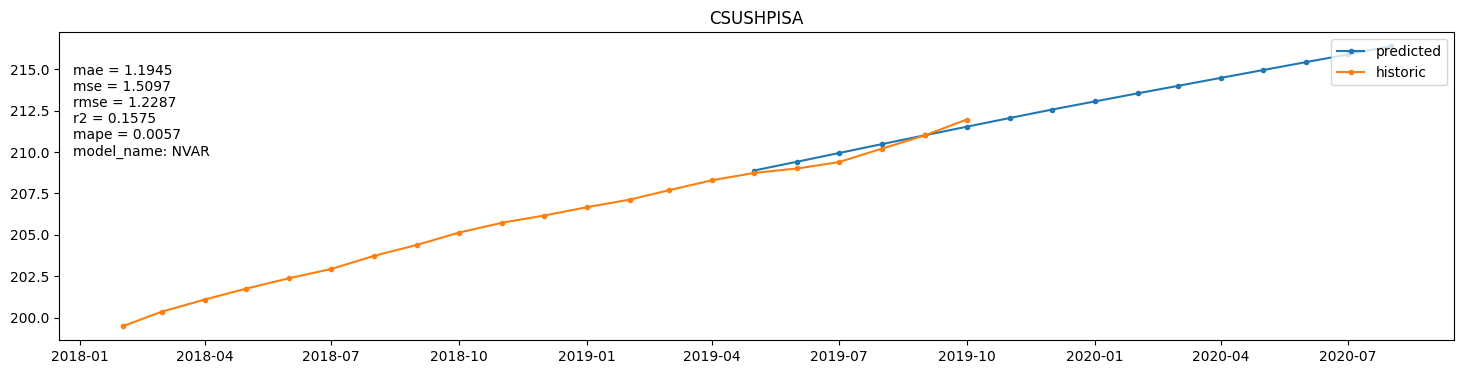

------------------------
series: EMVOVERALLEMV, best_model_name: MultivariateMotif


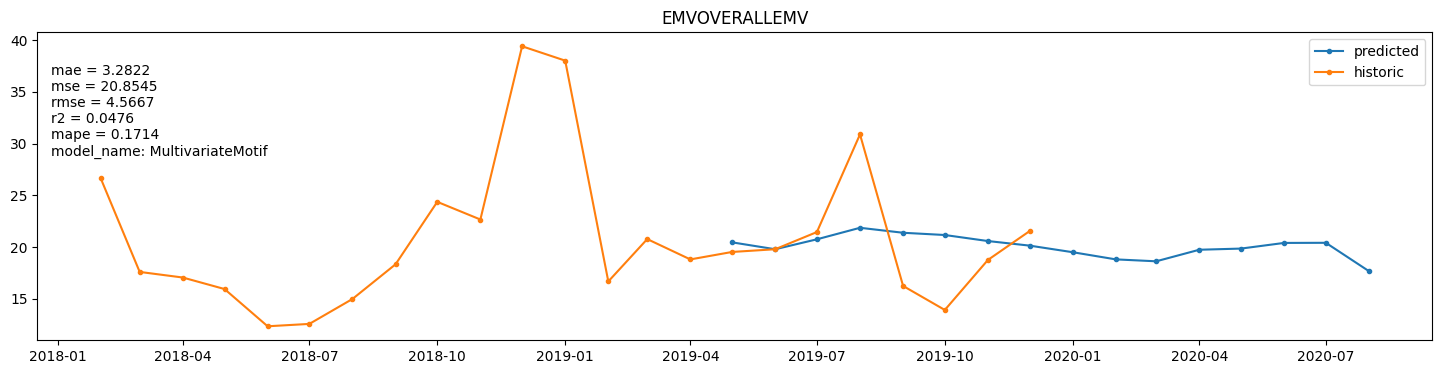

------------------------
series: EXCAUS, best_model_name: ARIMA


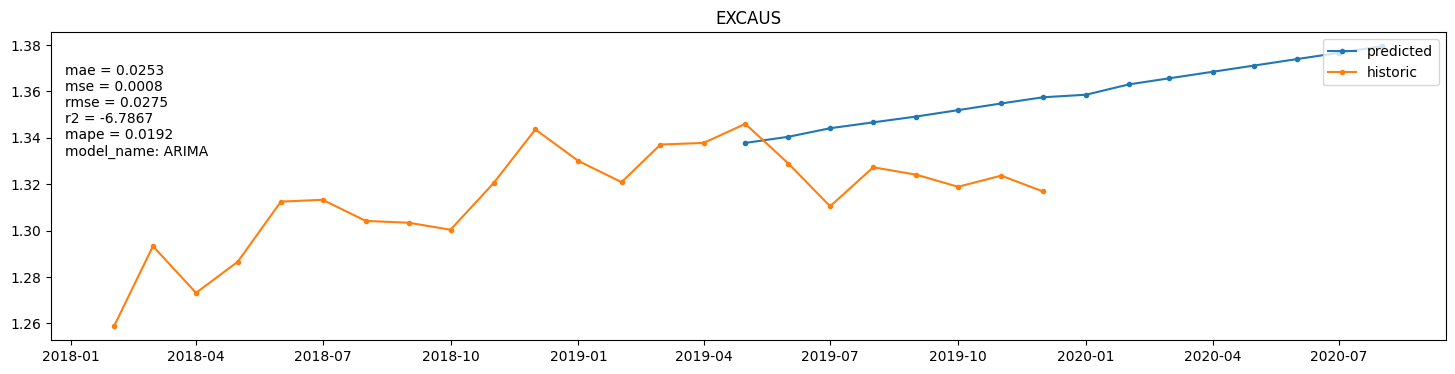

------------------------
series: EXCHUS, best_model_name: AverageValueNaive


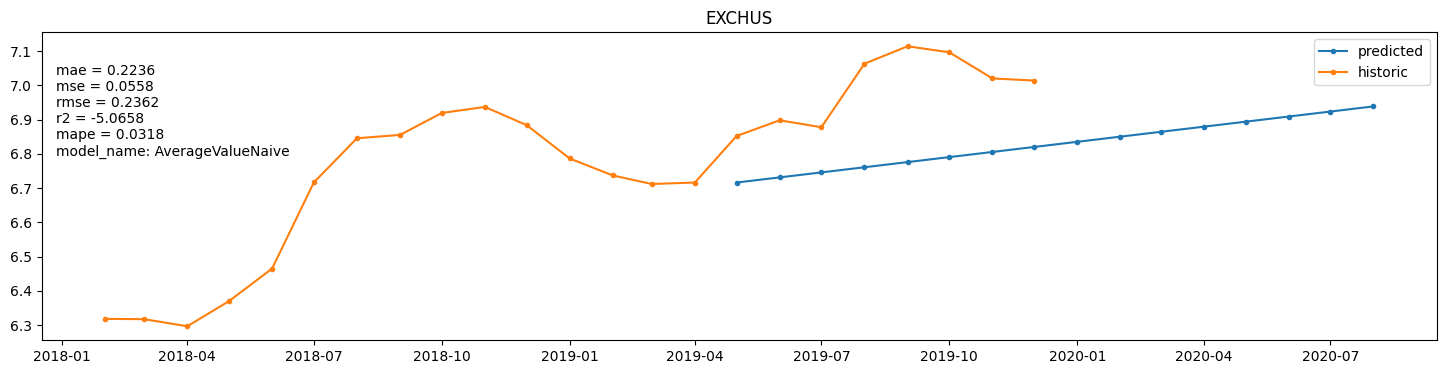

------------------------
series: EXUSEU, best_model_name: ARDL


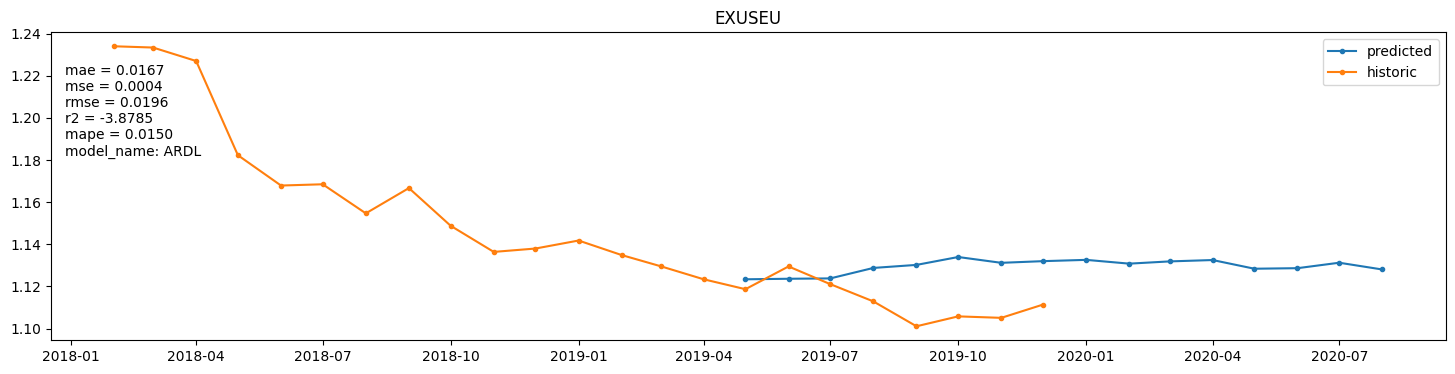

------------------------
series: GS10, best_model_name: LastValueNaive


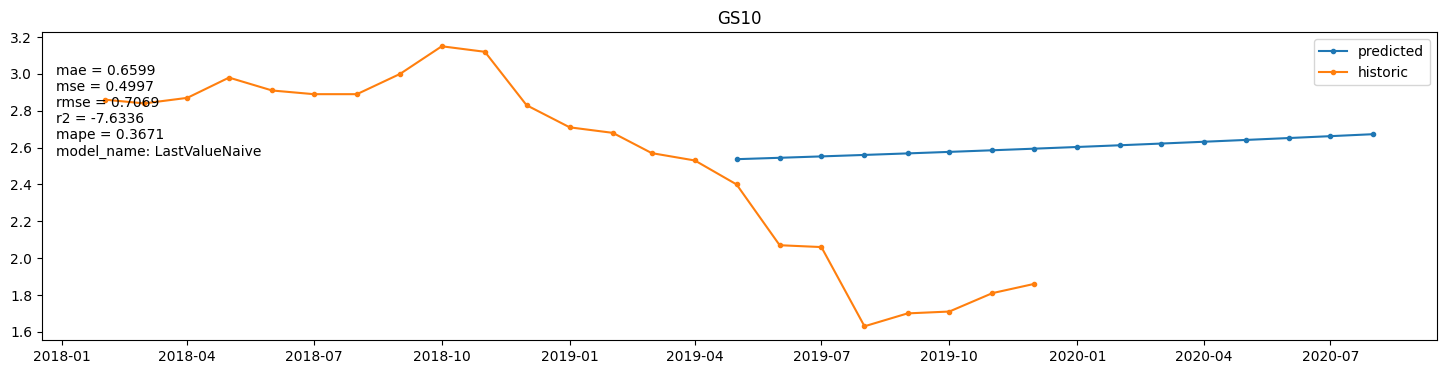

------------------------
series: MCOILWTICO, best_model_name: MultivariateMotif


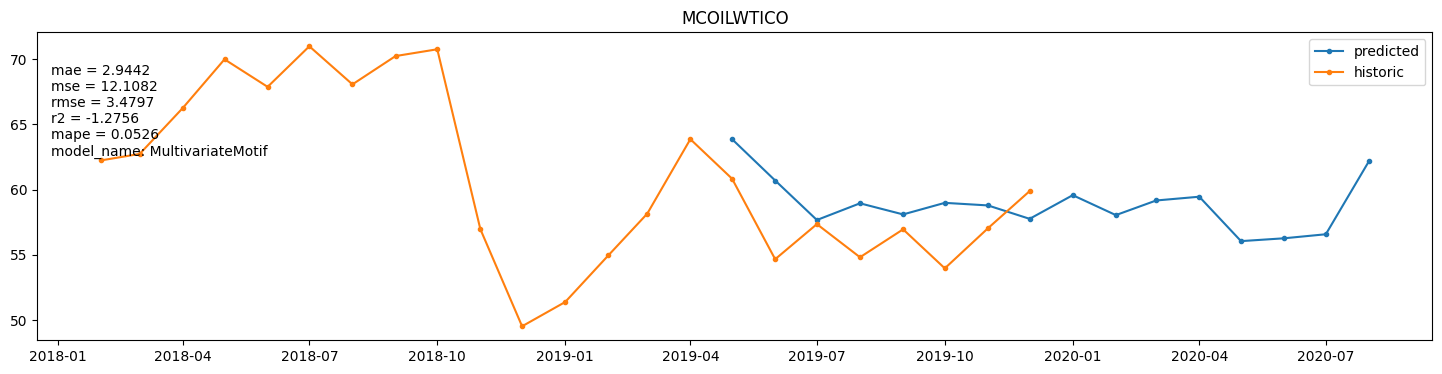

------------------------
series: T10YIEM, best_model_name: WindowRegression


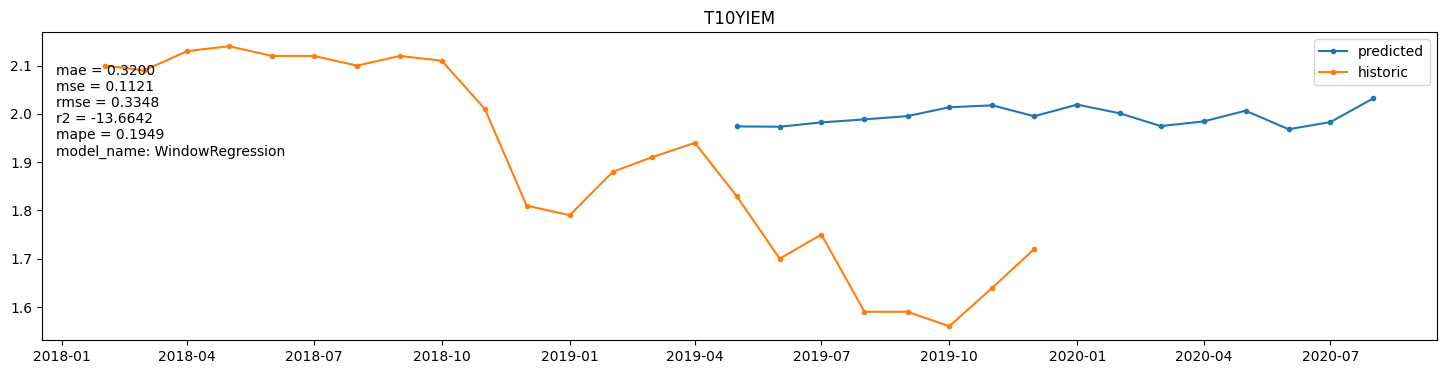

------------------------
series: USEPUINDXM, best_model_name: MultivariateMotif


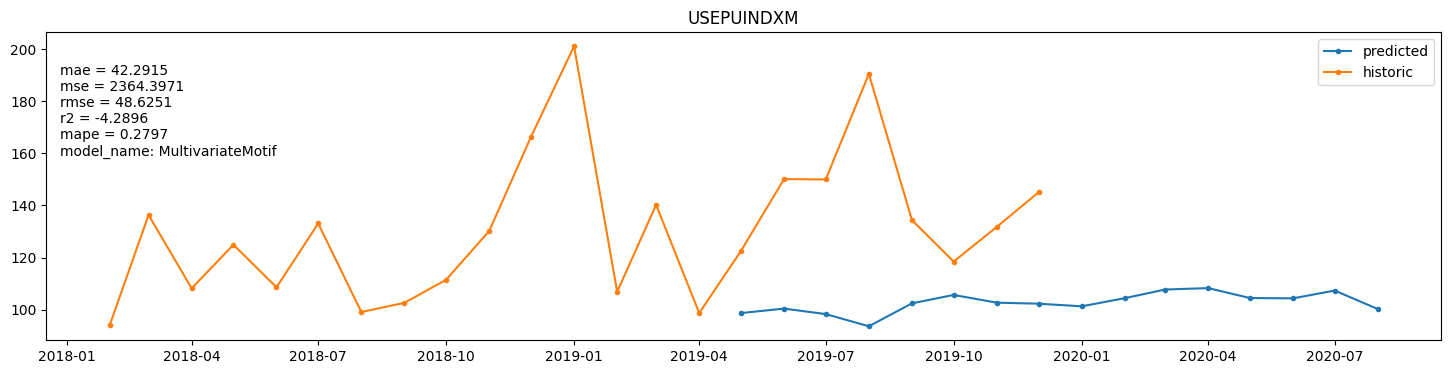

In [ ]:
# @title Plot results

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))


for series in model.horizontal_to_df().Series:

  print('------------------------')

  predicted_values = forecasts_df[series].values

  actual_values = df_long_test[df_long_test['series_id']==series].value.to_list()


  mae = mean_absolute_error(actual_values, predicted_values[:8])
  mse = mean_squared_error(actual_values, predicted_values[:8])
  rmse = np.sqrt(mse)
  r2 = r2_score(actual_values, predicted_values[:8])
  mape = mean_absolute_percentage_error(actual_values, predicted_values[:8])


  # print(f"mae = {mae:.4f}")
  # print(f"mse = {mse:.4f}")
  # print(f"rmse = {rmse:.4f}")
  # print(f"r2 = {r2:.4f}")
  # print(f"mape = {mape:.4f}")

  model_id = model.horizontal_to_df()[model.horizontal_to_df().Series == series].ID.to_list()[0]

  model_results = model.results()
  model_results = model_results[model_results.ID == model_id]
  best_model_name = model_results.Model.to_list()[0]


  print(f"series: {series}, best_model_name: {best_model_name}")

  metrics = f"mae = {mae:.4f} \n" +  f"mse = {mse:.4f} \n" +  f"rmse = {rmse:.4f} \n" +  f"r2 = {r2:.4f} \n" +  f"mape = {mape:.4f} \n" + f"model_name: {best_model_name}"


  plt.figure(figsize=(18, 4))  # Width x Height in inches

  x = forecasts_df[series].index.values
  y = forecasts_df[series].values
  plt.plot(x, y, label='predicted', marker='.')

  x = df_long[(df_long['series_id']==series) & (df_long['datetime'] > '2018')].datetime.values
  y = df_long[(df_long['series_id']==series) & (df_long['datetime'] > '2018')].value.values
  plt.plot(x, y, label='historic', marker='.')


  plt.annotate(metrics, xy=(0.01, 0.6), xycoords='axes fraction', fontsize=10)
  plt.title(series.upper())
  plt.legend(loc='upper right')

  plt.show()

  # break



